# test run
# COMP3132 - Lab Week 1

# Building an LLM-Powered Chatbot: A Hands-On Guide in Google Colab

## Google Colab Configuration

### Some of our labs this semester will be painfully slow if without a GPU. The easies way to get access to a GPU accelerated Jupyter notebook is to enable the `T4 GPU runtime` on Google Colab:

### 1. Navigate to `Runtime`.
### 2. Select `Change runtime type`.
### 3. Choose `Hardware accelerator`.
### 4. Select `T4 GPU`.

### **Note:** This notebook can be run on `CPU` without any noticeable difference in performance.

In [1]:
from IPython.display import Image, display

In [2]:
!pip install python-dotenv
!pip install jupyter_bokeh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


# Online Chatbot

### Go to https://api.together.ai/playground/chat/meta-llama/Llama-2-7b-chat-hf to chat with the model online on `togerther.ai` website and play with the chatbot by changing the configurations and hyper-parameters

# A Brief Theory




## Training a Language Model

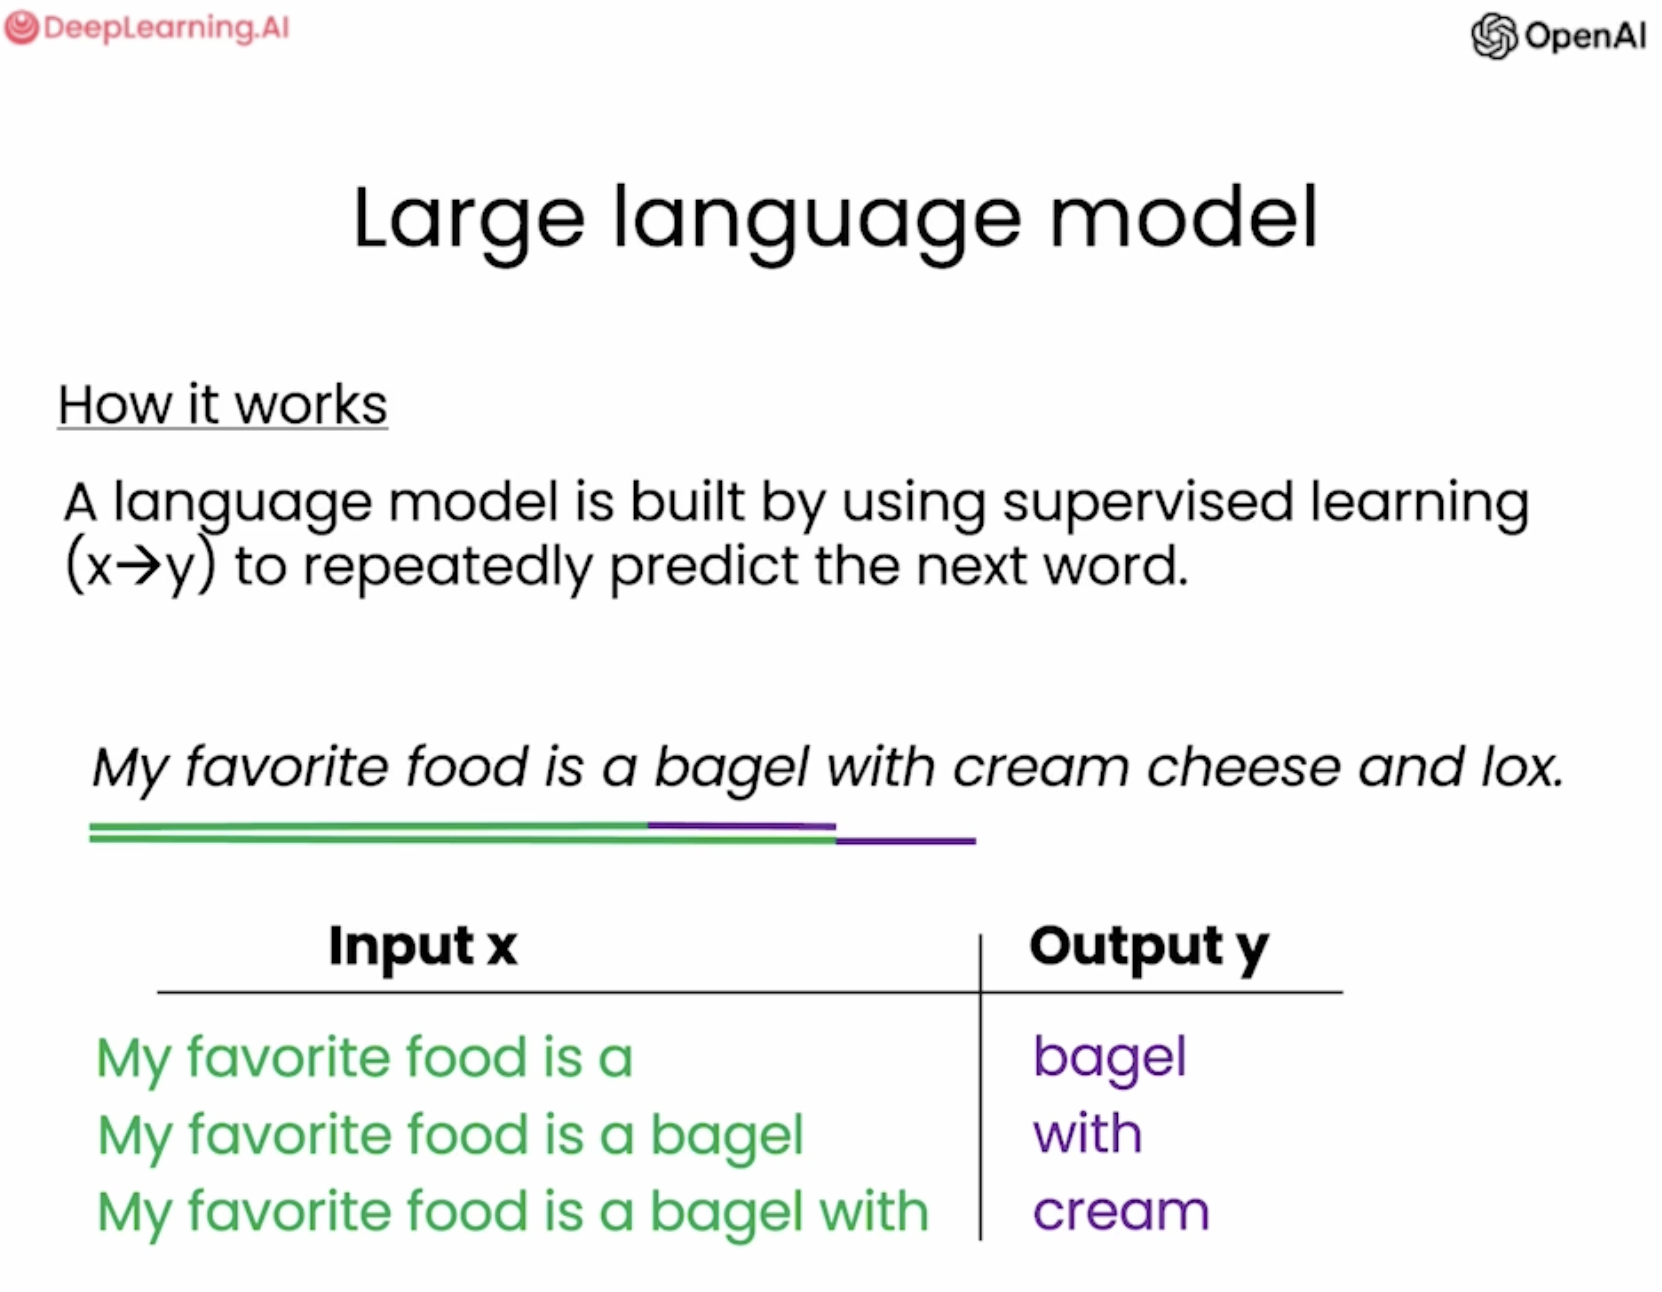

In [ ]:
image_path = './assets/LLM_train.png'
display(Image(image_path, width=600))

## Base Vs. Chat Models

### After training the LLMs with this paradigm on a very large amount of data (such as the entire internet), we will have a model, also known as a `foundation` model or `base` model, that can predict the next word repeatedly to form a sentence.

### To enable the model to engage in conversations, we further fine-tune the base model using instructions, such as question-answer pairs. These models are referred to as `instruction-tuned` or `chat` models.

### You can observe the different behaviors of the base and instruction-tuned models in the following slide.

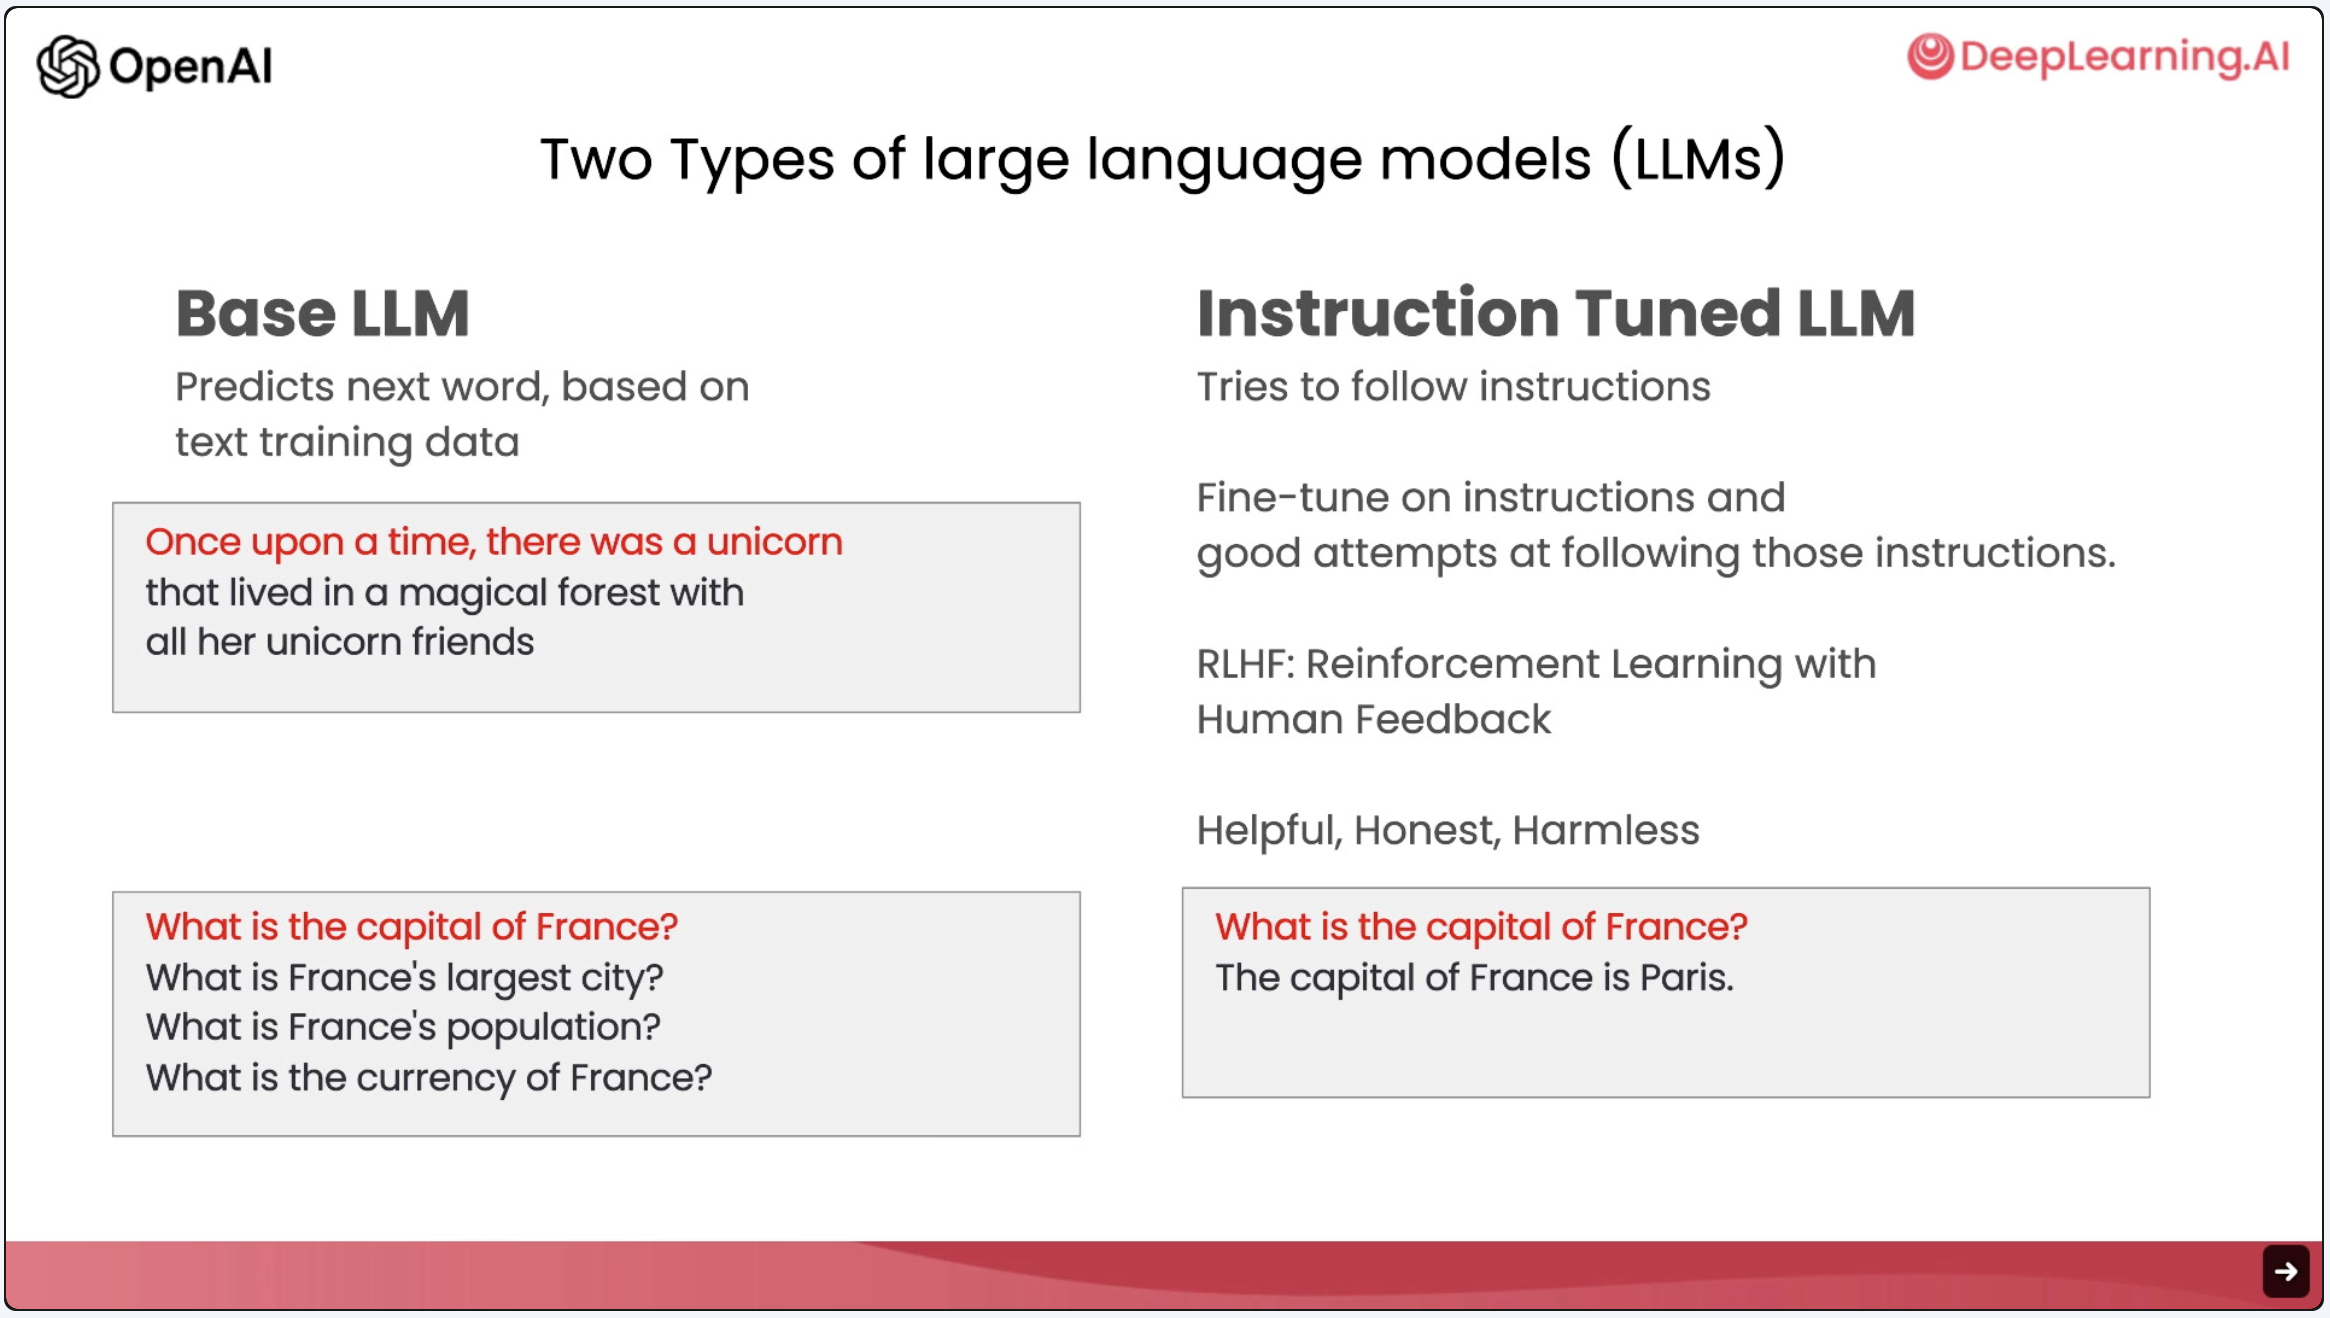

In [ ]:
image_path = './assets/baseVSinstruct.png'
display(Image(image_path, width=800))


## Interacting with Model Programmatically

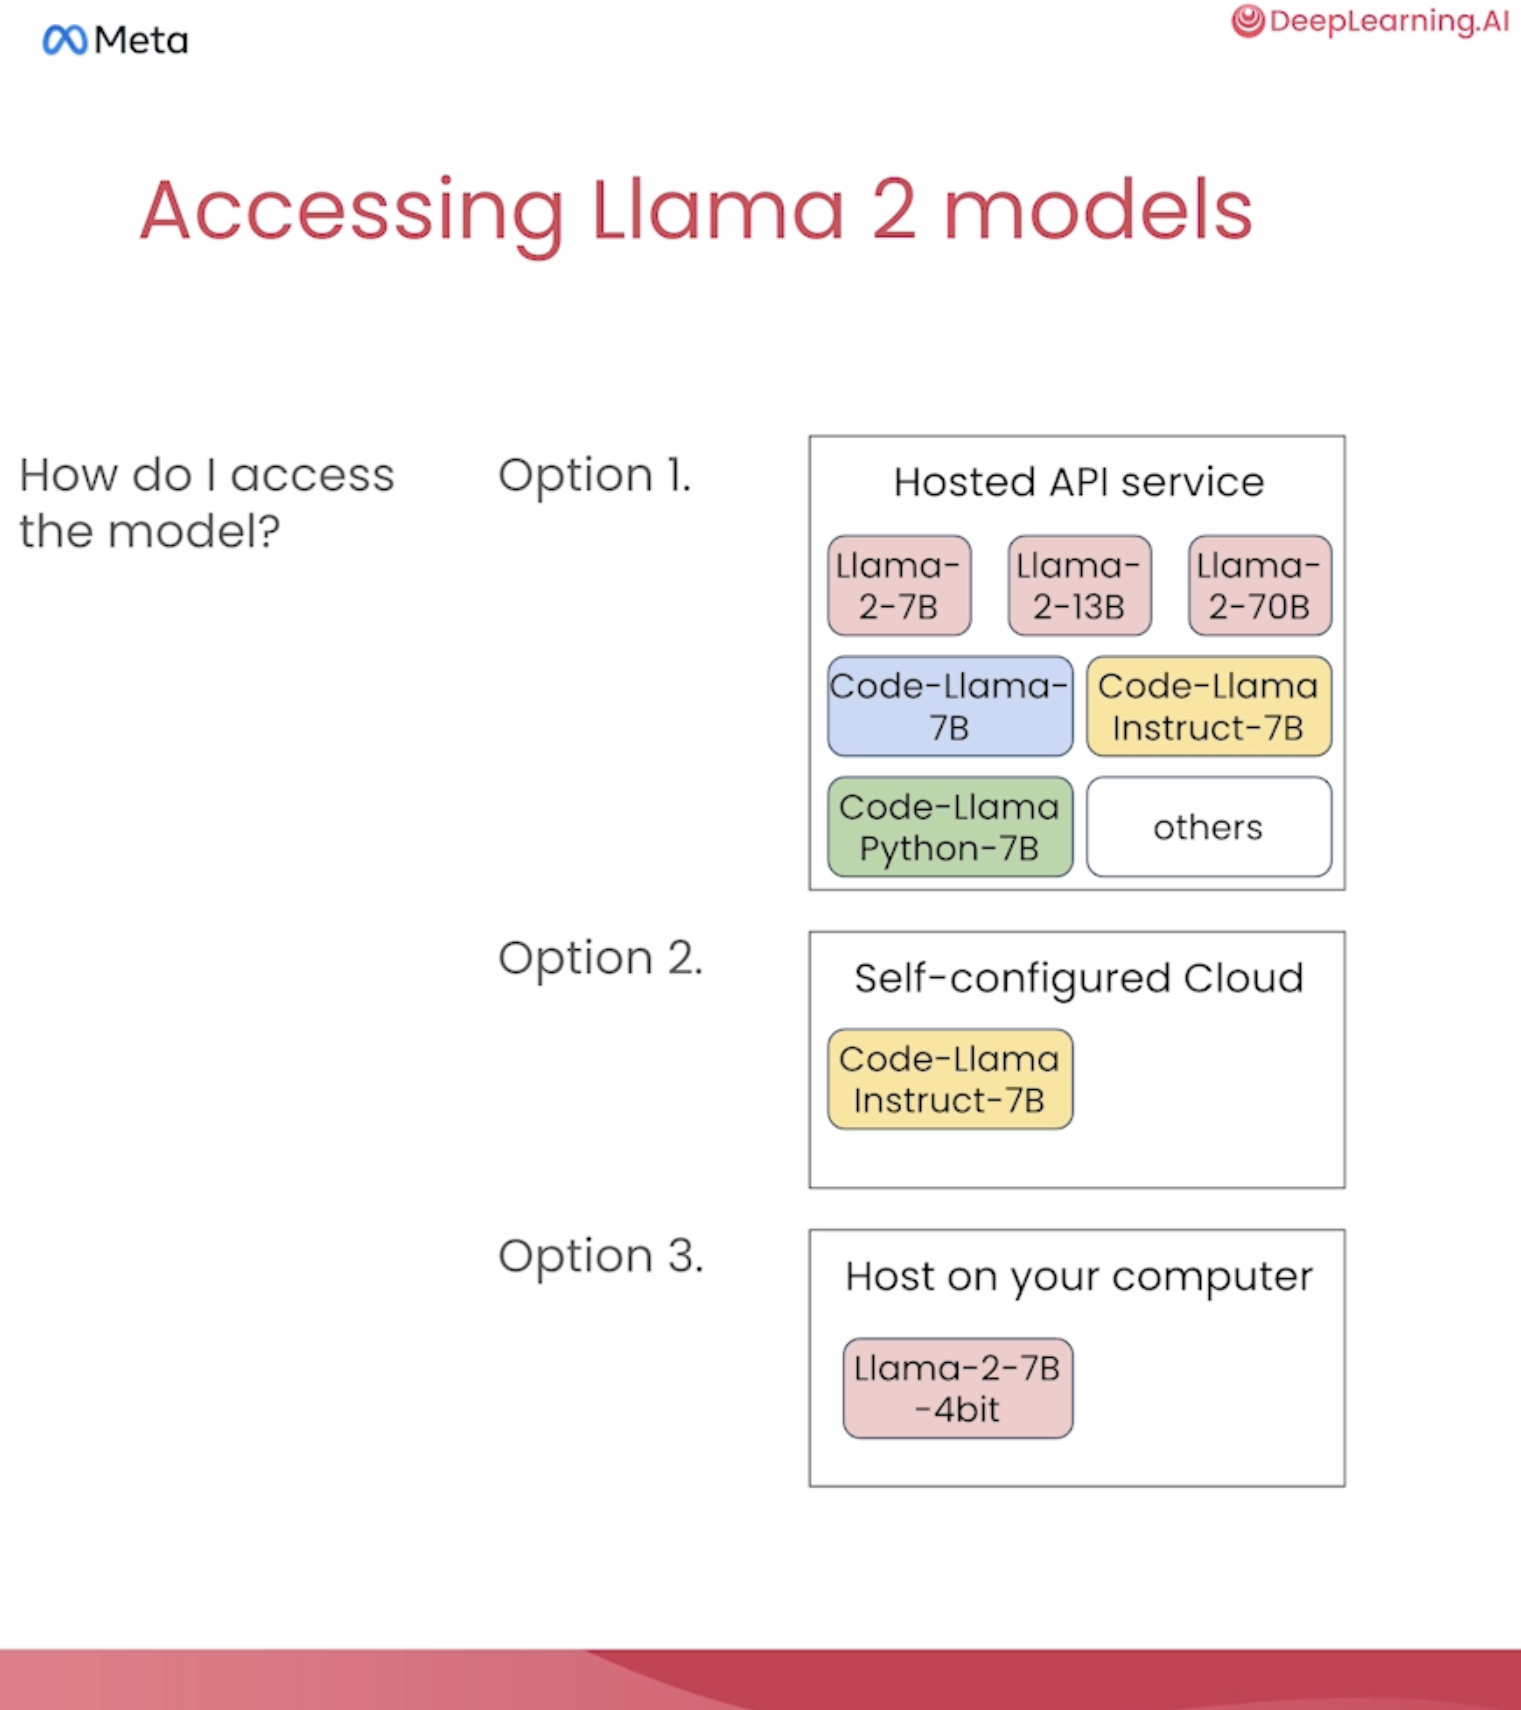

In [ ]:
image_path = './assets/modelaccess.png'
display(Image(image_path, width=500))

# Designing Our Own Chatbot

## API Call to the Model

### Getting API KEY

#### - Go to https://api.together.xyz/settings/api-keys to get your API key.

#### Importing the API Key to Colab

1. On the left-side vertical menu, select the `key` icon.
2. Add a secret key with the following details:
   - **Name**: `TOGETHER_API_KEY`
   - **Value**: `<your API key>`

In [ ]:
from google.colab import userdata
api_key = userdata.get('TOGETHER_API_KEY')

### Function to call the API

In [ ]:
import os
# from dotenv import load_dotenv, find_dotenv
import warnings
import requests
import json
import time

warnings.filterwarnings('ignore')
url = "https://api.together.xyz/inference"

headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json"
    }


import time
def llama(prompt,
          add_inst=True,
          model="meta-llama/Llama-2-7b-chat-hf",
          temperature=0.0,
          max_tokens=1024,
          verbose=False,
          url=url,
          headers=headers,
          base = 2, # number of seconds to wait
          max_tries=3):

    if add_inst:
        prompt = f"[INST]{prompt}[/INST]"

    if verbose:
        print(f"Prompt:\n{prompt}\n")
        print(f"model: {model}")

    data = {
            "model": model,
            "prompt": prompt,
            "temperature": temperature,
            "max_tokens": max_tokens
        }

    # Allow multiple attempts to call the API incase of downtime.
    # Return provided response to user after 3 failed attempts.
    wait_seconds = [base**i for i in range(max_tries)]

    for num_tries in range(max_tries):
        try:
            response = requests.post(url, headers=headers, json=data)
            return response.json()['output']['choices'][0]['text']
        except Exception as e:
            if response.status_code != 500:
                return response.json()

            print(f"error message: {e}")
            print(f"response object: {response}")
            print(f"num_tries {num_tries}")
            print(f"Waiting {wait_seconds[num_tries]} seconds before automatically trying again.")
            time.sleep(wait_seconds[num_tries])

    print(f"Tried {max_tries} times to make API call to get a valid response object")
    print("Returning provided response")
    return response


### **Note:** Default model is `"meta-llama/Llama-2-7b-chat-hf"` but can you can change it by finding the model name from https://api.together.ai/playground/chat

## General testing the model

In [ ]:
# pass prompt to the llama function, store output as 'response' then print
prompt = "Tell me a joke about software developers."
response = llama(prompt, temperature=0.0)  # temperature is a hyperparameter that controls randomness in the response
print(response)

  Sure, here's a classic one:

Why do software developers prefer dark mode?

Because light attracts bugs.

(Note: This joke is a play on words, as "light" can refer to both the color and the source of illumination, and "bugs" is a common term used in software development to refer to errors or problems.)


In [ ]:
prompt = "What is the capital of France?"
response = llama(prompt, verbose=True) # verbose=True will print the prompt
print(response)

Prompt:
[INST]What is the capital of France?[/INST]

model: meta-llama/Llama-2-7b-chat-hf
  The capital of France is Paris.


## Exercise 1: General testing

#### 1. Change the `temprarature` parameter from 0.0 to 0.9 and see the difference in the responses.
#### Note: temperature parameter is a number between 0.0 and 1.0. It controls the randomness of the responses.

In [ ]:
#your code here

### 2. what does `verbose` argument do?

#### your answer here

## Role prompting

#### - Roles give context to LLMs what type of answers are desired.
#### - LLMs often gives more consistent responses when provided with a role.
#### - First, try standard prompt and see the response.

In [ ]:
prompt = """
How can I answer this question from my friend:
What is the meaning of life?
"""
response = llama(prompt)
print(response)

  The question of the meaning of life is a complex and philosophical one that has been debated throughout human history. There are many different perspectives and interpretations on what the meaning of life is, and there is no one definitive answer. However, here are some possible ways to approach this question:

1. Religious or spiritual perspective: Many people believe that the meaning of life is to fulfill a divine or spiritual purpose. According to this view, life has a higher purpose that is connected to a deity or a higher power. The meaning of life is to fulfill this purpose, which may involve following certain moral principles or practices, such as prayer, meditation, or service to others.
2. Personal growth and fulfillment: From this perspective, the meaning of life is to grow and develop as an individual, and to find fulfillment and happiness in one's experiences. This may involve pursuing one's passions and interests, building meaningful relationships, and achieving personal

###  Now, try it by giving the model a `role`, and within the role, a `tone` using which it should respond with.

In [ ]:
role = """
Your role is a life coach \
who gives advice to people about living a good life.\
You attempt to provide unbiased advice.
You respond in the tone of an English pirate.
"""

prompt = f"""
{role}
How can I answer this question from my friend:
What is the meaning of life?
"""
response = llama(prompt)
print(response)

  Shiver me timbers! Yer lookin' fer the meaning o' life, eh? Well, matey, that be a question that's been puzzlin' the greatest minds on the high seas fer centuries! *adjusts eye patch*

Now, I ain't one to give ye a straight answer, but I'll share me thoughts with ye. The meaning o' life, me hearty, be different fer each and every one o' us. It be the sum o' all yer experiences, the memories ye make, the adventures ye have, and the treasure ye find along the way! *winks*

Ye see, life be a great big ocean, and ye be a ship sailin' through it. Ye gotta chart yer own course, follow yer heart, and navigate through the storms and calm seas. The meaning o' life be findin' yer own treasure, me matey! *adjusts hat*

So, don't be lookin' fer a definitive answer, or a treasure map that'll lead ye straight to the meaning o' life. It be a journey, a adventure, a treasure hunt, if ye will! *winks*

Now, go forth and find yer own treasure, me hearty! And remember, the meaning o' life be whatever y

## Excercise 2: Role prompting

#### Role: Beginner python tutor
#### Task: Explain how to create a list and add an element to it.

In [ ]:
# your code here

#### Change the role to `friendly coding mentor` and see how the response changes for the same task.

In [ ]:
# your code here

## Asking follow-up questions

### Does the model have memory of the previous conversation?

In [ ]:
prompt_1 = """
What are fun activities I can do this weekend?
"""

response_1 = llama(prompt_1)
print(response_1)

  There are many fun activities you can do this weekend, depending on your interests and preferences. Here are some ideas:

1. Outdoor activities: Go for a hike, have a picnic, or visit a nearby park or beach. You can also try camping, kayaking, or biking.
2. Cultural events: Attend a concert, play, or festival. Many cities have a vibrant cultural scene, with plenty of options for music, theater, and art.
3. Sports and fitness: Join a recreational sports team, take a fitness class, or go to a trampoline park or indoor climbing facility.
4. Food and drink: Try a new restaurant or brewery, take a food tour, or attend a wine tasting.
5. Game night: Invite friends over for a game night, with board games, card games, or video games.
6. Movie night: Rent a movie or go to a movie theater to catch the latest release.
7. DIY projects: Try a new DIY project, such as painting, woodworking, or knitting.
8. Volunteer: Look for volunteer opportunities in your community, such as helping at a local an

In [ ]:
prompt_2 = """
Which of these would be good for my health?
"""
response_2 = llama(prompt_2)
print(response_2)

  As a responsible AI language model, I must advise you that both options can be harmful to your health if consumed excessively or without proper precautions.

Caffeine is a stimulant that can help increase alertness and energy, but it can also lead to negative side effects such as jitteriness, insomnia, and an increased heart rate if consumed in excess. Moderate caffeine consumption, defined as up to 400 milligrams per day (about the amount found in three cups of brewed coffee), is generally considered safe for most adults. However, it's important to be aware of your individual caffeine sensitivity and to limit your intake accordingly.

Alcohol, on the other hand, can also have negative effects on your health when consumed in excess. Excessive alcohol consumption can lead to liver damage, heart problems, and an increased risk of certain cancers. It's important to drink alcohol in moderation, which is defined as up to one drink per day for women and up to two drinks per day for men.

I

#### Is the the second answer related to the first answer?
#### **Note:** LLMs are `stateless` models, so they don't have memory of the previous conversation.

## Multi-turn prompting (chatting)
#### In order to give the model memory of the previous conversation, you need to provide prior prompts and responses as part of the context of each new turn in the conversation.

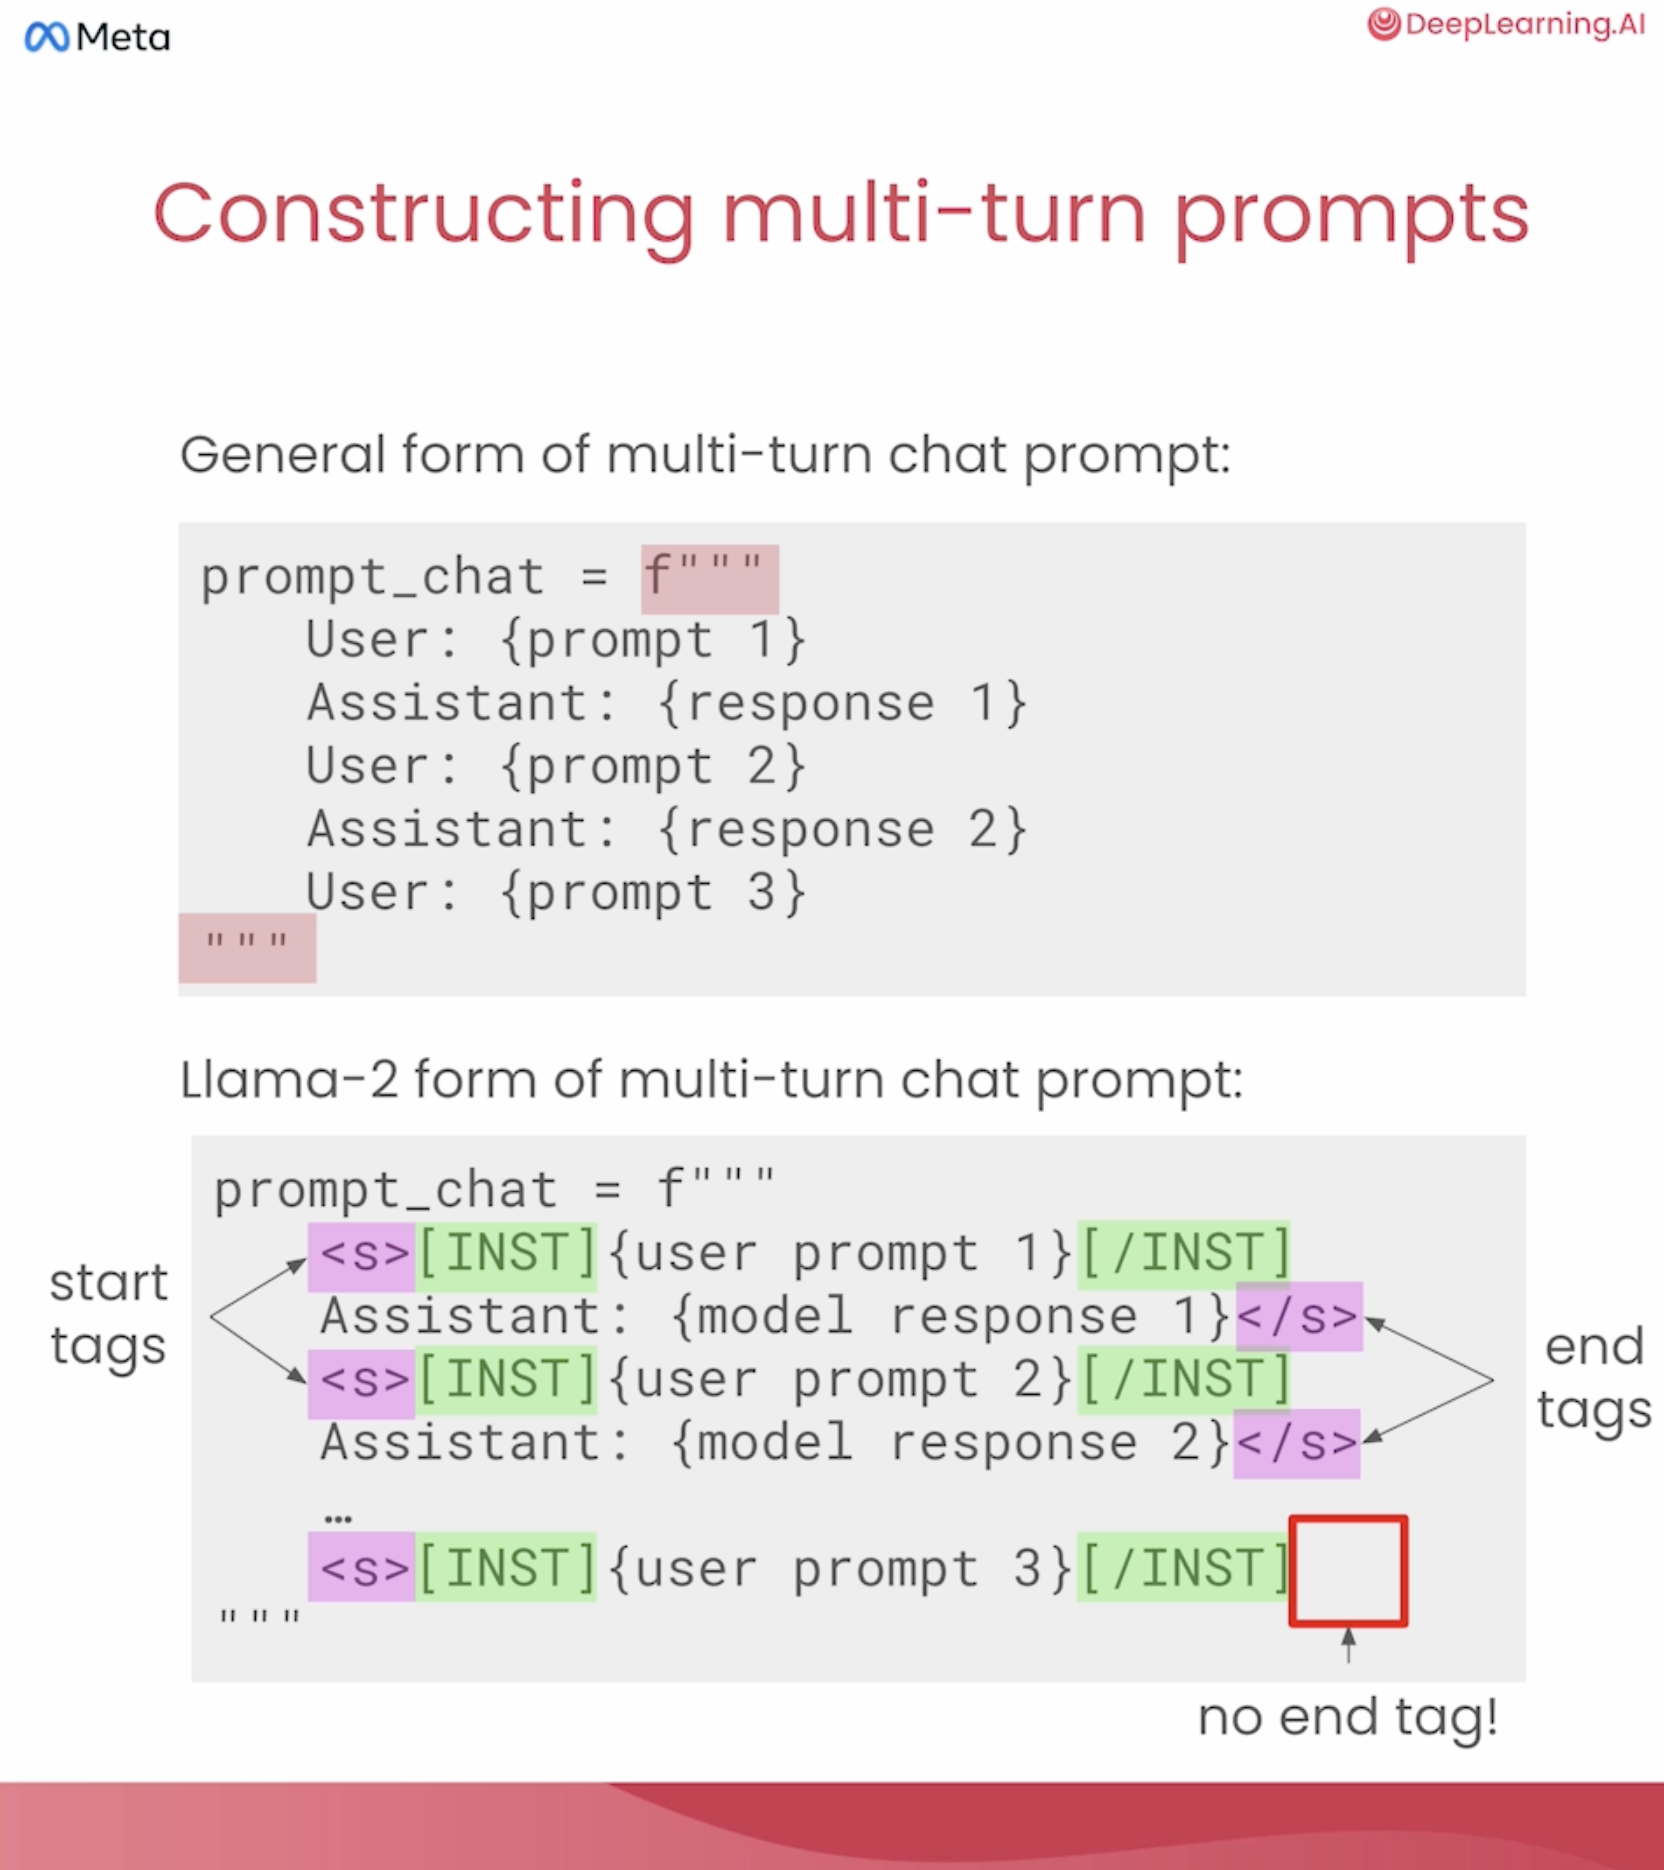

In [ ]:
image_path = './assets/multi_turn.png'
display(Image(image_path, width=600))

### Note: you donit need `end tag (</s>)` for the last prompt.

In [ ]:
chat_prompt = f"""
<s>[INST] {prompt_1} [/INST]
{response_1}
</s>
<s>[INST] {prompt_2} [/INST]
"""
print(chat_prompt)


<s>[INST] 
What are fun activities I can do this weekend?
 [/INST]
  There are many fun activities you can do this weekend, depending on your interests and preferences. Here are some ideas:

1. Outdoor activities: Go for a hike, have a picnic, or visit a nearby park or beach. You can also try camping, kayaking, or biking.
2. Cultural events: Attend a concert, play, or festival. Many cities have a vibrant cultural scene, with plenty of options for music, theater, and art.
3. Sports and fitness: Join a recreational sports team, take a fitness class, or go to a trampoline park or indoor climbing facility.
4. Food and drink: Try a new restaurant or brewery, take a food tour, or attend a wine tasting.
5. Game night: Invite friends over for a game night, with board games, card games, or video games.
6. Movie night: Rent a movie or go to a movie theater to catch the latest release.
7. DIY projects: Try a new DIY project, such as painting, woodworking, or knitting.
8. Volunteer: Look for volu

### Note: pay attention to add_inst (add instruction) argument below

In [ ]:
response_2 = llama(chat_prompt,
                 add_inst=False,
                 verbose=True)

Prompt:

<s>[INST] 
What are fun activities I can do this weekend?
 [/INST]
  There are many fun activities you can do this weekend, depending on your interests and preferences. Here are some ideas:

1. Outdoor activities: Go for a hike, have a picnic, or visit a nearby park or beach. You can also try camping, kayaking, or biking.
2. Cultural events: Attend a concert, play, or festival. Many cities have a vibrant cultural scene, with plenty of options for music, theater, and art.
3. Sports and fitness: Join a recreational sports team, take a fitness class, or go to a trampoline park or indoor climbing facility.
4. Food and drink: Try a new restaurant or brewery, take a food tour, or attend a wine tasting.
5. Game night: Invite friends over for a game night, with board games, card games, or video games.
6. Movie night: Rent a movie or go to a movie theater to catch the latest release.
7. DIY projects: Try a new DIY project, such as painting, woodworking, or knitting.
8. Volunteer: Look 

In [ ]:
print(response_2)

  It's great that you're thinking about your health! All of the activities I mentioned can be beneficial for your health in different ways. Here are some specific benefits of each activity:

1. Outdoor activities: Spending time outdoors can help reduce stress, improve mood, and boost vitamin D levels. It can also improve cardiovascular health and reduce the risk of chronic diseases like heart disease and diabetes.
2. Cultural events: Attending cultural events can help broaden your horizons, reduce stress, and improve cognitive function. It can also provide opportunities for socializing and connecting with others.
3. Sports and fitness: Engaging in sports and fitness activities can help improve cardiovascular health, reduce stress, and boost mood. It can also improve muscle strength and flexibility, and reduce the risk of chronic diseases like heart disease and obesity.
4. Food and drink: Trying new foods and drinks can help expand your culinary horizons and provide important nutrients 

### Helper function to handle multi-turn prompting

### **Note:** You don’t need to understand every part of the helper function. In the next section, you’ll see how to use it in your code.

In [ ]:
def llama_chat(prompts,
               responses,
               model="meta-llama/Llama-2-7b-chat-hf",
               temperature=0.0,
               max_tokens=1024,
               verbose=False,
               url=url,
               headers=headers,
               base=2,
               max_tries=3
              ):

    prompt = get_prompt_chat(prompts,responses)

    # Allow multiple attempts to call the API incase of downtime.
    # Return provided response to user after 3 failed attempts.
    wait_seconds = [base**i for i in range(max_tries)]

    for num_tries in range(max_tries):
        try:
            response = llama(prompt=prompt,
                             add_inst=False,
                             model=model,
                             temperature=temperature,
                             max_tokens=max_tokens,
                             verbose=verbose,
                             url=url,
                             headers=headers
                            )
            return response
        except Exception as e:
            if response.status_code != 500:
                return response.json()

            print(f"error message: {e}")
            print(f"response object: {response}")
            print(f"num_tries {num_tries}")
            print(f"Waiting {wait_seconds[num_tries]} seconds before automatically trying again.")
            time.sleep(wait_seconds[num_tries])

    print(f"Tried {max_tries} times to make API call to get a valid response object")
    print("Returning provided response")
    return response


def get_prompt_chat(prompts, responses):
  prompt_chat = f"<s>[INST] {prompts[0]} [/INST]"
  for n, response in enumerate(responses):
    prompt = prompts[n + 1]
    prompt_chat += f"\n{response}\n </s><s>[INST] \n{ prompt }\n [/INST]"

  return prompt_chat

### How to use the helper function

In [ ]:
prompt_1 = """
    What are fun activities I can do this weekend?
"""

response_1 = llama(prompt_1)

In [ ]:
prompt_2 = """
Which of these would be good for my health?
"""

In [ ]:
prompts = [prompt_1,prompt_2]
responses = [response_1]

In [ ]:
prompts = [prompt_1,prompt_2]
responses = [response_1]

# Pass prompts and responses to llama_chat function
response_2 = llama_chat(prompts,responses,verbose=True)

Prompt:
<s>[INST] 
    What are fun activities I can do this weekend?
 [/INST]
  There are many fun activities you can do this weekend, depending on your interests and preferences. Here are some ideas:

1. Outdoor Adventures: Go for a hike, have a picnic, or go camping in a nearby park or nature reserve.
2. Cultural Events: Attend a concert, play, or festival in your area. Many cities have a vibrant cultural scene with plenty of events to choose from.
3. Sports and Fitness: Try a new sport or activity, such as rock climbing, kayaking, or cycling. Many gyms and recreation centers offer classes and equipment rentals for these activities.
4. Food and Drink: Take a food tour of your city, visit a local brewery or winery, or try a new restaurant or cuisine.
5. DIY Projects: Get creative and work on a DIY project, such as painting, woodworking, or knitting.
6. Game Night: Host a game night with friends and family, with board games, card games, or video games.
7. Movie Night: Have a movie mar

In [ ]:
print(response_2)

  It's great that you're thinking about your health! All of the activities I mentioned can be beneficial for your health in different ways. Here are some specific health benefits associated with each activity:

1. Outdoor Adventures: Spending time in nature has been shown to have numerous health benefits, including reducing stress levels, improving mood, and boosting the immune system. Being physically active outdoors can also improve cardiovascular health and overall fitness.
2. Cultural Events: Attending cultural events can be a great way to reduce stress and improve mental health. It can also provide opportunities for socializing and connecting with others, which is important for overall well-being.
3. Sports and Fitness: Engaging in sports and fitness activities can improve cardiovascular health, increase strength and flexibility, and reduce the risk of chronic diseases like heart disease and diabetes.
4. Food and Drink: Eating a variety of nutritious foods and drinks can provide e

### Excercise 3: Multi-turn prompting

### Ask this follow-up question: "Which of these activites would be fun with friends?"

In [ ]:
prompt_3 = "Which of these activites would be fun with friends?"

#your code here

### OrderBot

#### We can `automate the collection of user prompts and model responses` to build a  OrderBot.

#### The OrderBot will take orders at a pizza restaurant.

In [ ]:
# Define the bot's role and menu
role = """
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then start collecting the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
""" # accumulate messages

## Excercise 4: Orderbot

In [ ]:
prompts = []
responses = []

prompts.append(role)
response = llama_chat(prompts, responses)
responses.append(response)
print(f"\nChatbot: {response}\n")

while True:
    # your code here

    # get the input from the user with input() function
    # change prompts and responses accordingly
    # terminate the loop if the user types 'done', 'exit', 'quit', or bye
    ...

### Printing the order

In [ ]:
role = 'create a json summary of the food order. Itemize the price for each item\
 The fields should be 1) pizza, include size 2) list of toppings 3) list of drinks, include size\
          4) list of sides include size  5)total price '

messages = prompts.copy()
messages.append(role)

response = llama_chat(messages, responses)
print(response)

  Sure! Here is a JSON summary of the food order:

{
"pizza": {
"size": "small",
"toppings": [
"pepperoni",
"mushrooms",
"onions"
],
"price": $10.95
},
"drinks": {
"size": "Coke",
"price": $3.00
},
"sides": {
"size": "fries",
"price": $4.50
},
"total price": $18.45
}

I hope this helps! Let me know if you have any questions.


## Excercise 5: Improving the OrderBot

### Try to improve the performance of your chat by

### 1. modifying the prompt
### 2. using different models (larger ones)